In [1]:
from tremlib import TremResearcher, sep
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
calib_images_path = fr'D:\Projects\Tremor\Calibration\Calibration photo\Accurate attempt 5'
researcher = TremResearcher(marks_num=5, marks_size_mm=10)
calib_images = researcher.photo_files(calib_images_path)

In [2]:
ALLOWABLE_ERROR = np.arange(5, 0, -5/60)[-16]

In [3]:
errors = np.loadtxt(f'..{sep}BIN FILES{sep}Errors for Accurate attempt 5 XY (2).txt')
x_errors, y_errors = errors
bool_indexes = np.logical_and(np.abs(x_errors) < ALLOWABLE_ERROR, np.abs(y_errors) < ALLOWABLE_ERROR)
len(calib_images[bool_indexes])

61

In [4]:
# researcher.calibrate(images_paths=calib_images[bool_indexes])
# researcher.save_calib_settings('D:\Projects\Tremor\BIN FILES\calib_settings 2.pkl')

In [5]:
researcher.load_calib_settings(r'D:\Projects\Tremor\BIN FILES\Calibration for Accurate attempt 5 (all) (corrected).pkl')
researcher.calibrated

True

In [6]:
def get_errors_finder3(researcher, frames_per_step, step_mm, text_for_log):
        def get_errors(check_img_paths):
            print(f"{text_for_log}. Started.\n")
            if len(check_img_paths) != 0 and sep in check_img_paths[0]:
                print(f'(Folder: {check_img_paths[0].split(sep)[-2]})')

            positions = np.ndarray(shape=(len(check_img_paths), researcher.AXES_COUNT))
            for img_num, image_path in enumerate(check_img_paths):
                frame = cv2.imread(image_path)
                coord, _ = researcher.get_xyz(frame)
                if coord is None:
                    positions[img_num] = [np.nan]*researcher.AXES_COUNT
                else:
                    positions[img_num] = list(coord.values())[0]
            positions = np.asarray(positions)
            positions -= positions[0]
            return positions
        return get_errors
#             length = np.asarray([np.linalg.norm(position) for position in positions])
#             r = length - np.asarray(
#                 [i * step_mm for i in range(len(length) // frames_per_step) for j in range(frames_per_step)])

#             print(f"{text_for_log}. Finished.\n")
#             if len(check_img_paths) != 0 and sep in check_img_paths[0]:
#                 print(f'(Folder: {check_img_paths[0].split(sep)[-2]})')

#             return r

In [7]:
FRAMES_PER_STEP = 5
STEP_MM = 5
test_calib_selection = researcher.get_errors_finder(
        frames_per_step=FRAMES_PER_STEP,
        step_mm=STEP_MM, text_for_log='')
calib_images_path = r'D:\Projects\Tremor\Calibration\Check calibration photo\Focus distance 50 mm 3\Y 15'
res_f = test_calib_selection(researcher.photo_files(calib_images_path))
res_f

. Started.

(Folder: Y 15)
. Finished.

(Folder: Y 15)


array([ 0.        ,  4.17691884,  0.13936944,  1.0934152 ,  2.25123394,
        1.61459461,  1.48550182,  0.36674077,  3.12894448,  2.10614112,
        0.8350108 ,  1.35179222,  0.3959666 , 27.49318843,  0.78913233,
        0.91659897,  0.82671799,  1.09572099,  1.13916027,  0.70262076,
        0.81421852,  1.42059332,  1.48815156, 16.33261323,  1.16656675,
        0.95719781,  1.09624582,  1.4302272 ,  1.27620969,  0.85274321,
        1.84531663,  1.2182664 ,  1.57892967, 15.18572596,  1.02605432,
        1.50756972,  1.47827124,  1.74080177,  1.12811796,  1.68239911,
        1.78488373,  1.51583054,  1.339543  ,  1.67667668,  1.44801842,
        1.71748839,  8.7199928 ,  1.8679944 ,  1.69196615,  1.7292075 ,
        1.62966071,  1.78803281,  1.71753071,  1.97620854,  1.8239641 ,
        1.79285002,  2.18291337,  1.86475988,  2.25466687,  1.77417766,
        2.18750604,  1.81293237,  1.8888032 ,  2.23483638,  1.82113129,
        1.73199327,  2.62833893,  2.21863384,  2.21226051,  1.70

In [8]:
plt.plot(list(range(len(res_f))), res_f[:,2])

NameError: name 'res_f' is not defined

In [6]:
mean_x, sigma_x  = res_f[0]
mean_y, sigma_y  = res_f[1]
mean_z, sigma_z  = res_f[2]

print((mean_x, mean_y))
print(np.mean((sigma_x)), np.mean((sigma_y)))
#print(len(sigma_x),len(sigma_y))

(1.979057796705051, 1.9069527541980038)
1.9779033169708757 1.8662365146275424


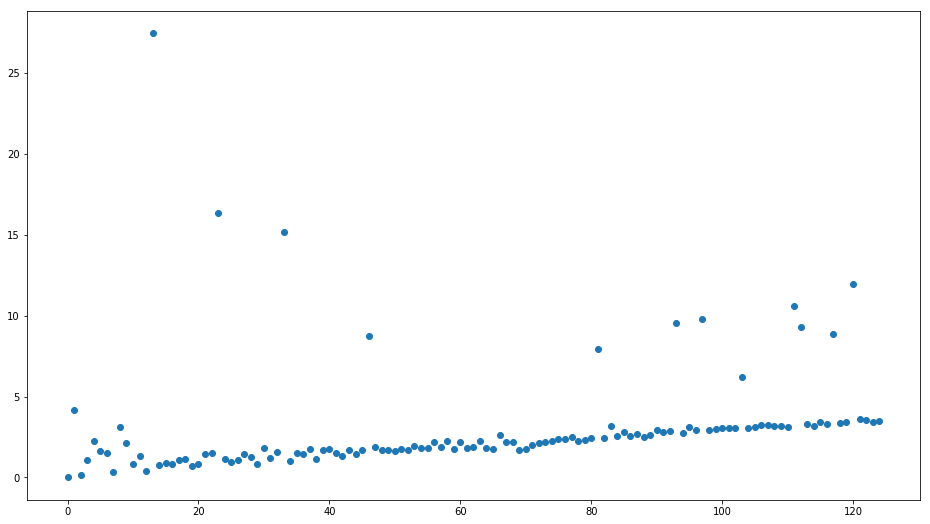

In [13]:
plt.rc('figure', figsize=[16,9])
plt.scatter(list(range(len(res_f))), res_f)

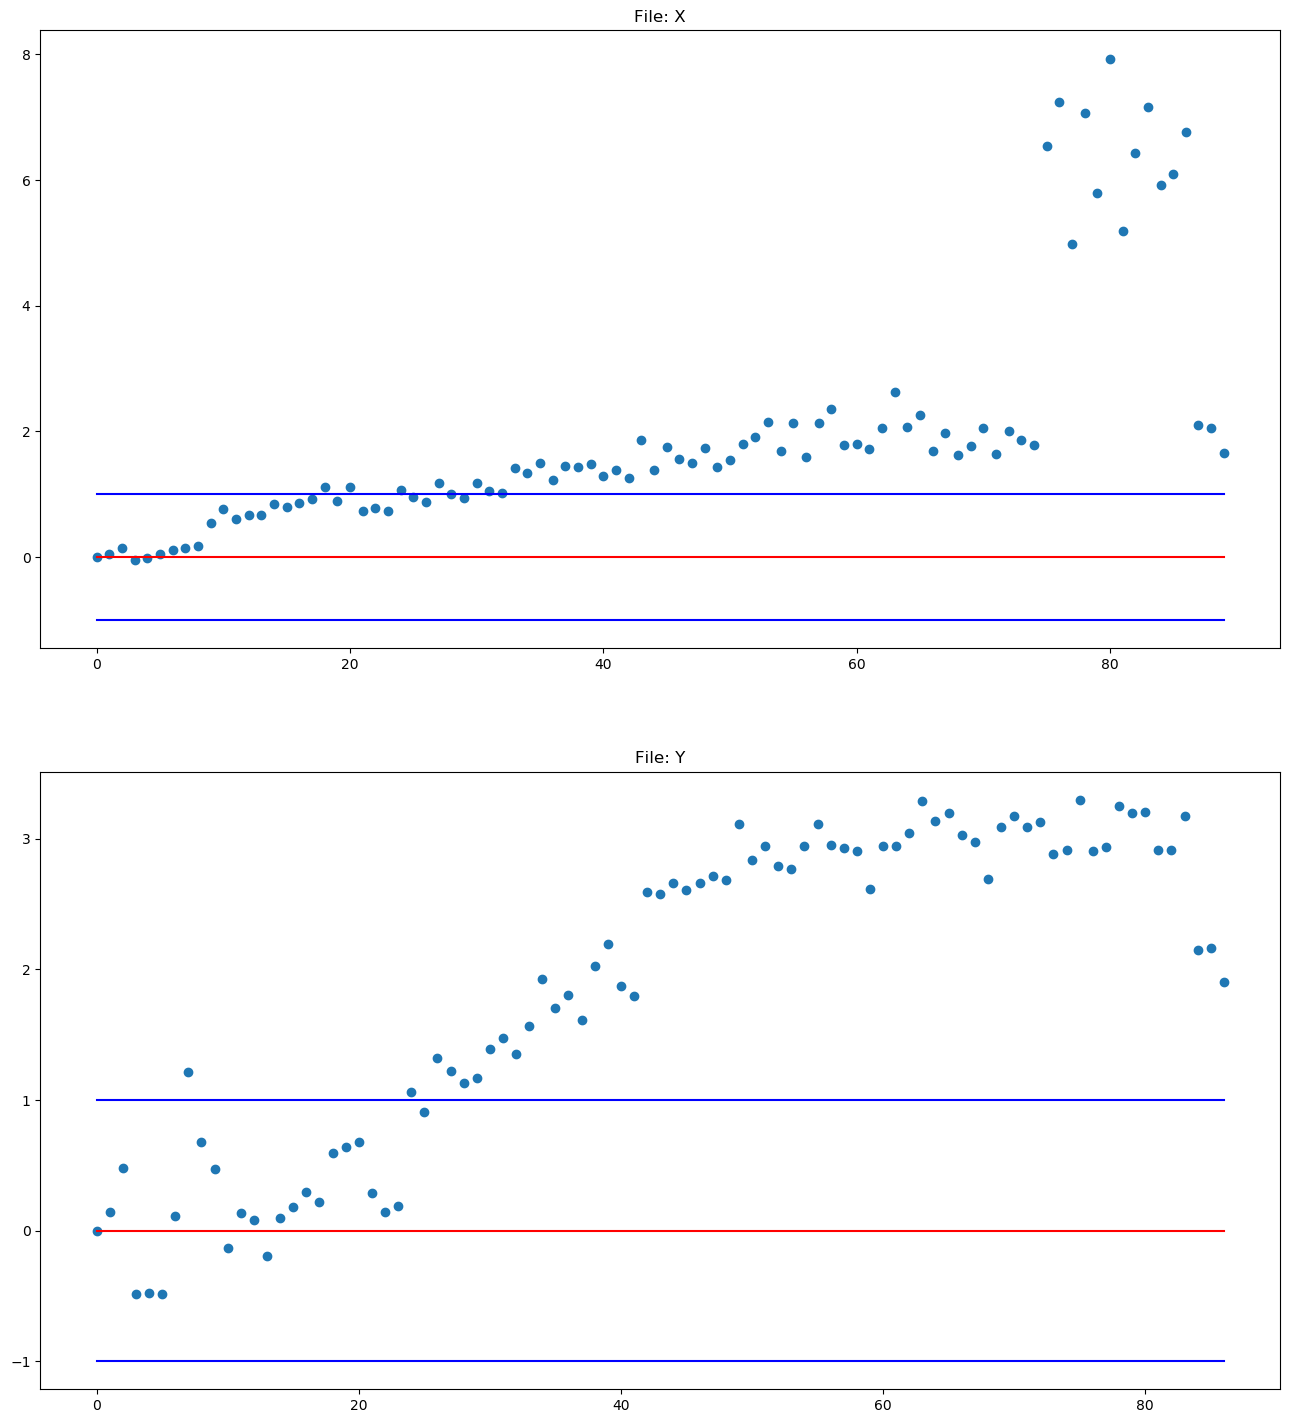

In [7]:
r = 500

deviations_X = sigma_x[:r]
deviations_Y = sigma_y[:r]
#deviations_Z = sigma_z - true_values
plot_name = ['X', 'Y']#['X', 'Y', 'Z']
fig, axes = plt.subplots(2, dpi=100, figsize=(16, 9*2))
for col, div in enumerate([deviations_X, deviations_Y]): #deviations_Z
        axes[col].scatter(range(len(div)), div)
        axes[col].plot(range(len(div)), [0] *len(div), c='r' )
        axes[col].plot(range(len(div)), [1] *len(div), c='b' )
        axes[col].plot(range(len(div)), [-1] *len(div), c='b' )
        axes[col].title.set_text('File: %s' % (plot_name[col]))

In [14]:
np.max(np.abs(deviations_X)), np.max(np.abs(deviations_Y))

(6.090967416844947, 8.394724339228617)

In [40]:
true_values = np.asarray([i*5 for i in range(len(data[0])//3) for j in range(3)])

plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["figure.dpi"] = 200
for i, ar in enumerate(np.asarray(data)):
    plt.scatter(range(len(ar)), ar)
    plt.scatter(range(len(ar)), true_values, c='r')
    plt.savefig("deviation_%2d.jpg" % i)
    plt.clf()

NameError: name 'data' is not defined

[(1, 0.9019279425686854),
 (2, 1.352813814873595),
 (3, 1.3818311517215365),
 (4, 1.036413957697725),
 (5, 0.7262512729278711),
 (6, 2.8323788551627818),
 (7, 4.935978633844356),
 (8, 3.955753634394064),
 (9, 2.517555348404157),
 (10, 1.3325097704325972),
 (11, 1.213404769995262),
 (12, 1.758150789859564),
 (13, 1.973468021894532),
 (14, 2.009256253722157),
 (15, 1.3790139892563171),
 (16, 1.2391687815762464),
 (17, 1.5091670070076637),
 (18, 1.15831436669081),
 (19, 1.098217792757713),
 (20, 1.2284353831968196),
 (21, 1.1532081854723293),
 (22, 0.8328935996871214),
 (23, 0.7649508303886627),
 (24, 0.756200273303397),
 (25, 0.7668008682932705),
 (26, 0.7749303200426678),
 (27, 0.7782454678269445),
 (28, 0.37777040051433375),
 (29, 0.4900329143321424),
 (30, 0.6369454828144389),
 (31, 0.6615197072904545),
 (32, 0.6552255379805392),
 (33, 0.6027081104725646),
 (34, 0.5526005300179428),
 (35, 0.5496468965132503)]

In [9]:
from multiprocess import Pool, TimeoutError
import time
import os
from functools import partial

calib_images_path = fr'D:\Projects\Tremor\Calibration\Calibration photo\Accurate attempt 5'
calib_images = researcher.photo_files(calib_images_path)
files_to_check = len(calib_images)

def f(calib_images_path, i):
    from tremlib import TremResearcher
    import numpy as np
    import cv2
    researcher = TremResearcher(marks_num=5, marks_size_mm=10)
    calib_images = researcher.photo_files(calib_images_path)
    calib_num = len(calib_images)
    
    check_img_paths_X = researcher.\
                         photo_files(r'D:\Projects\Tremor\Calibration\Check calibration photo\Focus distance 50 mm 2\X')
    check_img_paths_Y = researcher.\
                         photo_files(r'D:\Projects\Tremor\Calibration\Check calibration photo\Focus distance 50 mm 2\Y')
    
    print(f"Calibrate with {i} file. Started.")
    researcher.calibrate(images_paths=[calib_images[i]])
    #researcher.calibrate(images_paths=calib_images)
    print(f"Calibrate with {i} file. Finished.")
    
    def mean_and_track(check_img_paths):
        print(f"Recognize with {i} file. Started.")
        postions = []
        for image_path in check_img_paths:
            frame = cv2.imread(image_path)
            postions += list(researcher.get_xyz(frame)[0].values())

        postions = np.asarray(postions)
        postions -= postions[0]
        
        length = [np.linalg.norm(position) for position in postions]
        r = np.abs(length - np.asarray([i*5 for i in range(len(length)//3) for j in range(3)]))
    
        return np.mean(r), r
    
    return mean_and_track(check_img_paths_X), mean_and_track(check_img_paths_Y)

if __name__ == '__main__':
    with Pool(min(len(calib_images), 64)) as pool:    #min(len(calib_images), 32)
        new_f = partial(f, calib_images_path)
        res_f = pool.map(new_f, range(files_to_check))

In [10]:
means_x  = []
sigmas_x = []
means_y  = []
sigmas_y = []

signed_means_x = []
signed_means_y = []

for x, y in res_f:
    means_x  += [x[0]]
    sigmas_x += [x[1]]
    means_y  += [y[0]]
    sigmas_y += [y[1]]

for i, t in enumerate(list(zip(sigmas_x, sigmas_y))):
    signed_means_x += [np.mean(t[0])]
    signed_means_y += [np.mean(t[1])]                           
    print("%2d" % i, "%3.4f %2.4f" % (signed_means_x[-1], signed_means_y[-1]))
    

 0 1.3761 1.5863
 1 1.3756 1.6576
 2 1.4882 1.5140
 3 70.2516 22.6167
 4 65.3751 18.4229
 5 60.2790 15.6560
 6 58.4620 12.6610
 7 52.4524 10.4284
 8 46.3374 8.7795
 9 40.8754 7.3806
10 34.6230 5.6932
11 28.4266 4.1347
12 24.1567 3.2895
13 20.7314 2.3803
14 19.8000 2.3983
15 17.2947 1.4815
16 15.2576 1.2304
17 13.2430 1.2124
18 11.1096 1.3133
19 9.3078 1.4179
20 7.8830 1.4966
21 6.8063 1.5995
22 6.1156 1.7161
23 4.6686 1.8178
24 4.0429 1.8653
25 3.4068 1.8986
26 2.8734 1.9072
27 2.3095 1.8932
28 1.9091 1.8617
29 1.5258 1.8052
30 1.3250 1.7579
31 1.1508 1.6992
32 1.0454 1.6452
33 0.9705 1.5973
34 0.9301 1.5464
35 0.9046 1.4929
36 0.8977 1.4349
37 0.8990 1.3793
38 0.9019 1.3322
39 0.9025 1.2746
40 0.9024 1.2187
41 0.9035 1.1831
42 0.9141 1.1357
43 1.0589 1.0737
44 1.2012 1.0409
45 1.4034 1.0234
46 1.2072 1.0349
47 1.9464 1.0012
48 2.0505 1.0053
49 2.3747 1.0178
50 2.7144 1.0368
51 2.7022 1.1175
52 3.0781 1.1937
53 3.4628 1.2894
54 4.0061 1.4279
55 4.6166 1.6302
56 5.3951 1.8851
57 4.8342 

In [8]:
edge = 0.25
X = np.asarray(signed_means_x[np.logical_and(np.abs(signed_means_x) < edge, np.abs(signed_means_y) < edge)])
Y = np.asarray(signed_means_y[np.logical_and(np.abs(signed_means_x) < edge, np.abs(signed_means_y) < edge)])
plt.plot(range(len(X)), X)
plt.plot(range(len(Y)), Y)
plt.plot(range(len(X)), [0]*len(X))
plt.show()

NameError: name 'signed_means_x' is not defined

In [11]:
a = np.asarray([signed_means_x, signed_means_y])
np.savetxt('Errors for Accurate attempt 5 XY (2).txt', a)


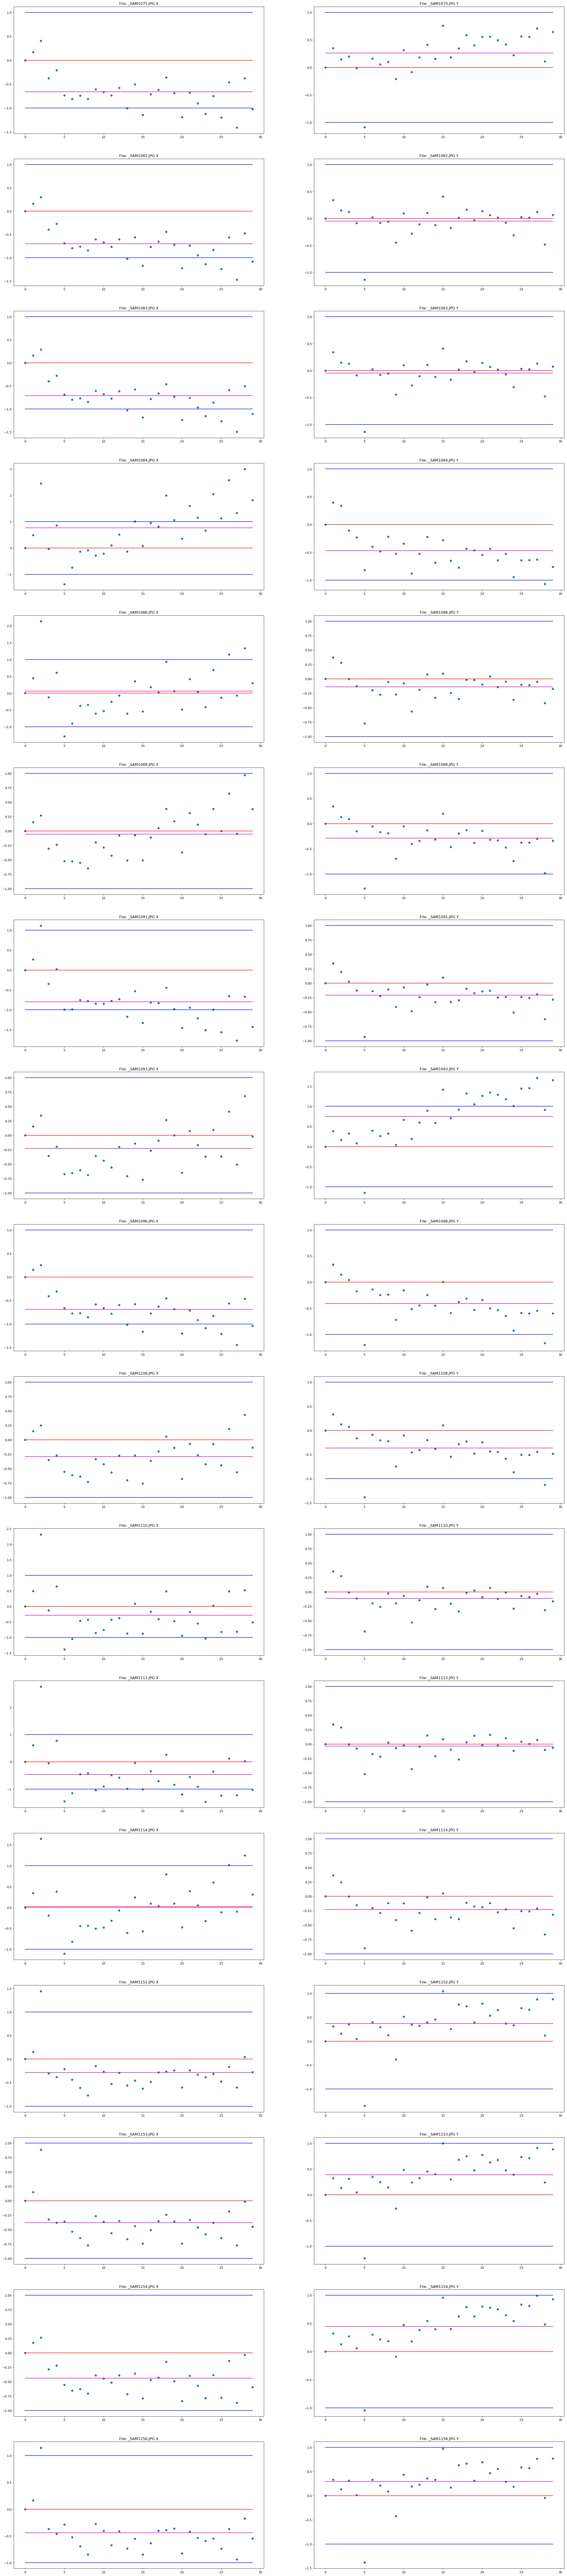

In [57]:
true_values =  np.asarray([i*5 for i in range(len(sigmas_x)//3) for j in range(3)])
deviations_X = sigmas_x - true_values
deviations_Y = sigmas_y - true_values
plot_name = ['X', 'Y']
fig, axes = plt.subplots(len(deviations_X), 2, dpi=100, figsize=(16*2, 9*len(deviations_X)))
means = [signed_means_x, signed_means_y]
for col, div in enumerate([deviations_X, deviations_Y]):
    for i, arr in enumerate(div):
        axes[i][col].scatter(range(len(arr)), arr)
        axes[i][col].plot(range(len(arr)), [0] *len(arr), c='r' )
        axes[i][col].plot(range(len(arr)), [1] *len(arr), c='b' )
        axes[i][col].plot(range(len(arr)), [-1] *len(arr), c='b' )
        axes[i][col].plot(range(len(arr)), [means[col][i]]*len(arr), c='m')
        axes[i][col].title.set_text('File: %s %s' % (calib_images[i].rsplit('\\',1)[1], plot_name[col]))

In [4]:
fig.savefig('XY.jpg')


NameError: name 'fig' is not defined

In [64]:
def true_to_inx(ar):
    L = []
    for i, x in enumerate(ar):
        if x:
            L += [i]
    return L

edge = 1.5
to_del_x = set(true_to_inx(np.abs(np.asarray(signed_means_x)) > edge))
#to_del_y = set(true_to_inx(np.abs(np.asarray(signed_means_y)) > edge))
to_del = to_del_x #| to_del_y 

to_del

{1,
 2,
 3,
 4,
 5,
 6,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 51,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 66,
 67}

In [65]:
import os
path = r'D:\Projects\Tremor\Calibration\Calibration photo\BACK\Attempt union 2'

res = list(os.walk(path))
pth, folders, files = res[0]
files_to_del = []
print(files)
for i, file in enumerate(files):
    if i in to_del:
        files_to_del += [path + '\\' + file]
files_to_del

['_SAM1075.JPG', '_SAM1076.JPG', '_SAM1077.JPG', '_SAM1078.JPG', '_SAM1079.JPG', '_SAM1080.JPG', '_SAM1081.JPG', '_SAM1082.JPG', '_SAM1083.JPG', '_SAM1084.JPG', '_SAM1085.JPG', '_SAM1086.JPG', '_SAM1087.JPG', '_SAM1088.JPG', '_SAM1089.JPG', '_SAM1090.JPG', '_SAM1091.JPG', '_SAM1092.JPG', '_SAM1093.JPG', '_SAM1095.JPG', '_SAM1096.JPG', '_SAM1097.JPG', '_SAM1098.JPG', '_SAM1099.JPG', '_SAM1100.JPG', '_SAM1103.JPG', '_SAM1104.JPG', '_SAM1105.JPG', '_SAM1106.JPG', '_SAM1107.JPG', '_SAM1108.JPG', '_SAM1109.JPG', '_SAM1110.JPG', '_SAM1111.JPG', '_SAM1112.JPG', '_SAM1113.JPG', '_SAM1114.JPG', '_SAM1115.JPG', '_SAM1116.JPG', '_SAM1117.JPG', '_SAM1118.JPG', '_SAM1119.JPG', '_SAM1120.JPG', '_SAM1121.JPG', '_SAM1122.JPG', '_SAM1123.JPG', '_SAM1124.JPG', '_SAM1125.JPG', '_SAM1126.JPG', '_SAM1127.JPG', '_SAM1128.JPG', '_SAM1129.JPG', '_SAM1130.JPG', '_SAM1131.JPG', '_SAM1132.JPG', '_SAM1133.JPG', '_SAM1135.JPG', '_SAM1136.JPG', '_SAM1137.JPG', '_SAM1138.JPG', '_SAM1139.JPG', '_SAM1140.JPG', '_SAM11

['D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1076.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1077.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1078.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1079.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1080.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1081.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1084.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1085.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1086.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK\\Attempt union 2\\_SAM1087.JPG',
 'D:\\Projects\\Tremor\\Calibration\\Calibration photo\\BACK

In [66]:
print("FILES HAVE BEEN DELETED")
for file in files_to_del:
    os.remove(file)

FILES HAVE BEEN DELETED


In [63]:
signed_means_x = np.asarray(signed_means_x)
signed_means_x[np.abs(np.asarray(signed_means_x)) < edge]

signed_means_x = np.asarray(signed_means_x)
signed_means_x[np.abs(np.asarray(signed_means_x)) < edge]

array([ 0.17203338,  0.04061433, -0.02657141, -0.58237652, -0.05696096,
        0.14356022,  0.40534668,  0.52986372,  0.7744439 ,  1.12712753,
        0.92586841,  0.46985878,  0.11038192, -1.05809778, -1.0912054 ,
       -1.37727615, -0.44951571, -1.24226426, -1.15604659, -0.67212024,
       -1.37747075, -0.95788119, -0.58558948, -0.13038376, -0.05042997,
        1.22429909,  0.97728658,  0.67874183,  0.86427003,  0.32288277,
        0.4512337 ,  0.48577191,  0.21033671,  0.2327986 ,  0.32240288,
        0.38776683,  0.40259826,  0.46351748,  0.40993843,  0.44892372,
        0.47044702,  0.53422602,  0.58091909,  0.56426234,  0.53558746,
        0.58421058,  0.6961676 ,  0.68189444,  0.80270898,  0.93617182])

In [56]:
x = signed_means_x[np.abs(np.asarray(signed_means_x)) > edge]
y = signed_means_y[np.abs(np.asarray(signed_means_x)) > edge]
for i, t in enumerate(list(zip(x, y))):
    print("%2d" % i, "%3.4f %2.4f" % (t[0], t[1]))

TypeError: only integer scalar arrays can be converted to a scalar index

98